# Loading Data and Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import numpy.random as nr
import scipy.stats as ss
import math

%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#importing data
Housing_Data = pd.read_csv('housing.csv')


# Analysing Data 

In [3]:
Housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Social_Security_No
count,20336.000000,20336.000000,20336.000000,20336.000000,20132.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000
mean,-119.588616,35.648811,28.791994,2634.124902,538.231820,1426.680075,499.989182,3.857913,206542.045486,40007.835218
std,2.007265,2.138344,12.542150,2183.486435,421.984358,1135.663034,383.229082,1.883422,114864.607151,5844.400764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,30000.000000
25%,-121.810000,33.940000,18.000000,1446.750000,296.000000,786.000000,279.000000,2.566625,120000.000000,35023.000000
50%,-118.510000,34.260000,29.000000,2126.000000,435.000000,1166.000000,410.000000,3.528800,179200.000000,39908.000000
75%,-118.030000,37.720000,37.000000,3145.000000,647.000000,1727.000000,606.000000,4.722200,263600.000000,45007.250000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,59620.000000


In [4]:
print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in Housing_Data.columns.values]


the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
ocean_proximity.	
median_house_value.	
Social_Security_No.	


[None, None, None, None, None, None, None, None, None, None, None]

In [5]:
Housing_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Social_Security_No
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,47686
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,43441
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,42834
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,37025
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,37303


In [6]:
Housing_Data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
Social_Security_No      int64
dtype: object

# Impute missing data

In [7]:
Housing_Data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        204
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
Social_Security_No      0
dtype: int64

In [8]:
#Filling the nulls in total_bedrooms with the mean

Housing_Data = Housing_Data.fillna(Housing_Data.mean())

In [9]:
# checking for nulls again

Housing_Data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
Social_Security_No    0
dtype: int64

# Clean Data


Drop features which are ID

In [10]:
## Dropping feature column Social_Security_No which would not contribute to the prediction

Housing_Data.drop('Social_Security_No', axis = 1, inplace = True)

In [11]:
## Checking columns after dropping id feature
print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in Housing_Data.columns.values]
print(Housing_Data.shape)



the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
ocean_proximity.	
median_house_value.	
(20336, 10)


There are now 20336 rows and 10 columns in the dataset

# Visualizing Data

# Categorical Data  - Feature Engineering / Transformation

In [12]:
Housing_Data.ocean_proximity.value_counts()


<1H OCEAN     8924
INLAND        6462
NEAR OCEAN    2655
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

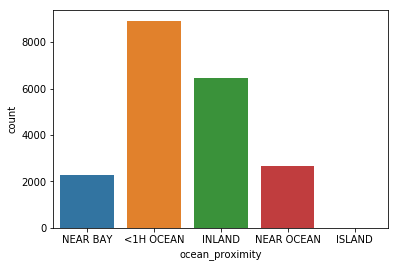

In [13]:
sns.countplot(Housing_Data.ocean_proximity)

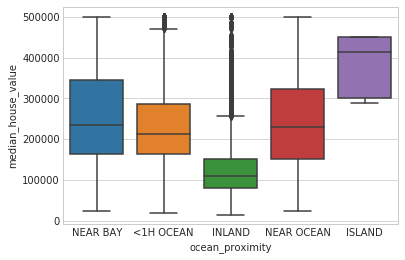

In [14]:
def plot_box(Housing_Data, col, col_y = 'median_house_value'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=Housing_Data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(Housing_Data, 'ocean_proximity') 

Notice that there are only five houses with Ocean Proximity value Island.  
It is likely that this category will not have statistically significant difference in predicting house price. 
It is clear that this category needs to be aggregated with another suitable category

The code in the cell below uses a Python dictionary to recode the number of Ocean Proximity categories into a smaller number categories. 


In [15]:
ocean_proximity_categories = {'<1H OCEAN':'<1H_OCEAN', 'INLAND':'INLAND', 
                    'NEAR OCEAN':'NEAR_OCEAN_ISLAND', 'ISLAND':'NEAR_OCEAN_ISLAND',
                    'NEAR BAY':'NEAR BAY'}
Housing_Data['ocean_proximity'] = [ocean_proximity_categories[x] for x in Housing_Data['ocean_proximity']]
Housing_Data['ocean_proximity'].value_counts()

<1H_OCEAN            8924
INLAND               6462
NEAR_OCEAN_ISLAND    2660
NEAR BAY             2290
Name: ocean_proximity, dtype: int64

In [16]:
#Categorical variable Ocean_proximity
new_val = pd.get_dummies(Housing_Data.ocean_proximity)

In [17]:
new_val.head()

,<1H_OCEAN,INLAND,NEAR BAY,NEAR_OCEAN_ISLAND
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [18]:
Housing_Data[new_val.columns] = new_val

In [19]:
Housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,NEAR BAY,NEAR_OCEAN_ISLAND
count,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000,20336.000000
mean,-119.588616,35.648811,28.791994,2634.124902,538.231820,1426.680075,499.989182,3.857913,206542.045486,0.438828,0.317762,0.112608,0.130803
std,2.007265,2.138344,12.542150,2183.486435,419.862357,1135.663034,383.229082,1.883422,114864.607151,0.496256,0.465618,0.316121,0.337193
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.810000,33.940000,18.000000,1446.750000,297.000000,786.000000,279.000000,2.566625,120000.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.510000,34.260000,29.000000,2126.000000,438.000000,1166.000000,410.000000,3.528800,179200.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.030000,37.720000,37.000000,3145.000000,644.000000,1727.000000,606.000000,4.722200,263600.000000,1.000000,1.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


# Correlation 

In [20]:
Housing_Data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,NEAR BAY,NEAR_OCEAN_ISLAND
longitude,1.000000,-0.924345,-0.097997,0.042569,0.069335,0.100982,0.055488,-0.026310,-0.054906,0.315152,-0.050101,-0.474223,0.049953
latitude,-0.924345,1.000000,-0.001161,-0.033206,-0.066287,-0.109793,-0.070724,-0.068173,-0.135669,-0.441048,0.346758,0.358552,-0.165869
housing_median_age,-0.097997,-0.001161,1.000000,-0.363225,-0.322745,-0.300113,-0.306212,-0.107100,0.117801,0.060341,-0.249802,0.253871,0.018132
total_rooms,0.042569,-0.033206,-0.363225,1.000000,0.927281,0.857356,0.918397,0.195354,0.130770,-0.007647,0.030601,-0.022928,-0.009506
total_bedrooms,0.069335,-0.066287,-0.322745,0.927281,1.000000,0.874159,0.974905,-0.009369,0.048207,0.016784,-0.004193,-0.020226,0.000050
population,0.100982,-0.109793,-0.300113,0.857356,0.874159,1.000000,0.907123,0.003896,-0.025559,0.075161,-0.019906,-0.061595,-0.025383
households,0.055488,-0.070724,-0.306212,0.918397,0.974905,0.907123,1.000000,0.011329,0.064726,0.041146,-0.037186,-0.010572,0.000705
median_income,-0.026310,-0.068173,-0.107100,0.195354,-0.009369,0.003896,0.011329,1.000000,0.684732,0.155336,-0.227530,0.059575,0.029725
median_house_value,-0.054906,-0.135669,0.117801,0.130770,0.048207,-0.025559,0.064726,0.684732,1.000000,0.246739,-0.479571,0.163349,0.145949
<1H_OCEAN,0.315152,-0.441048,0.060341,-0.007647,0.016784,0.075161,0.041146,0.155336,0.246739,1.000000,-0.603506,-0.315011,-0.343042


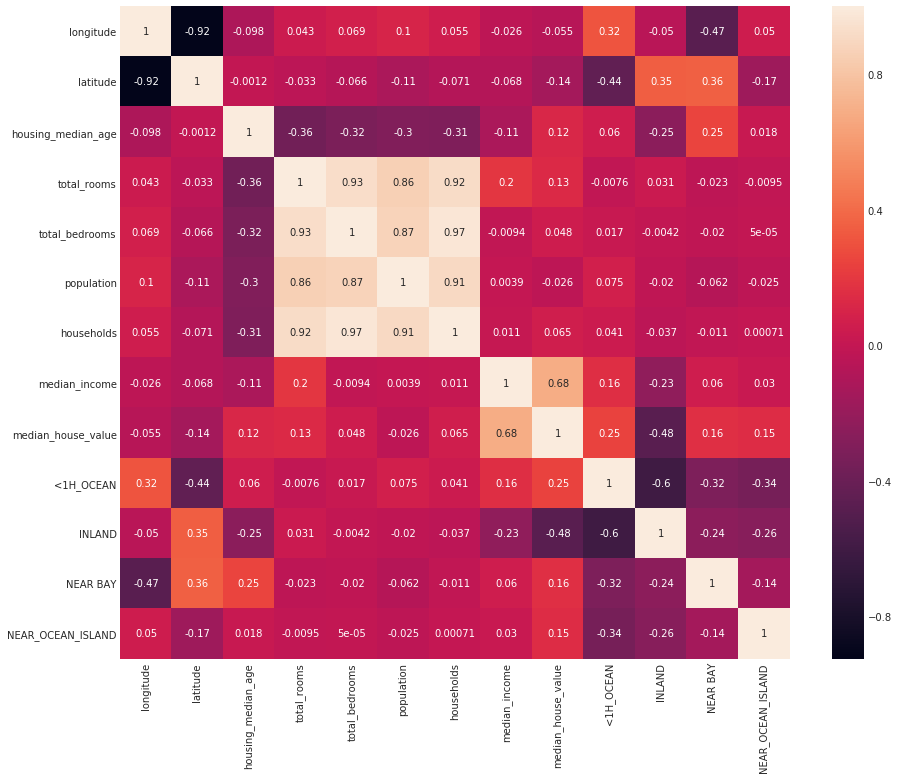

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(Housing_Data.corr(), annot=True)

The light colour boxes have high correlations

# Numeric Features  - Feature Engineering / Transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ad7536dd8>,
      dtype=object)

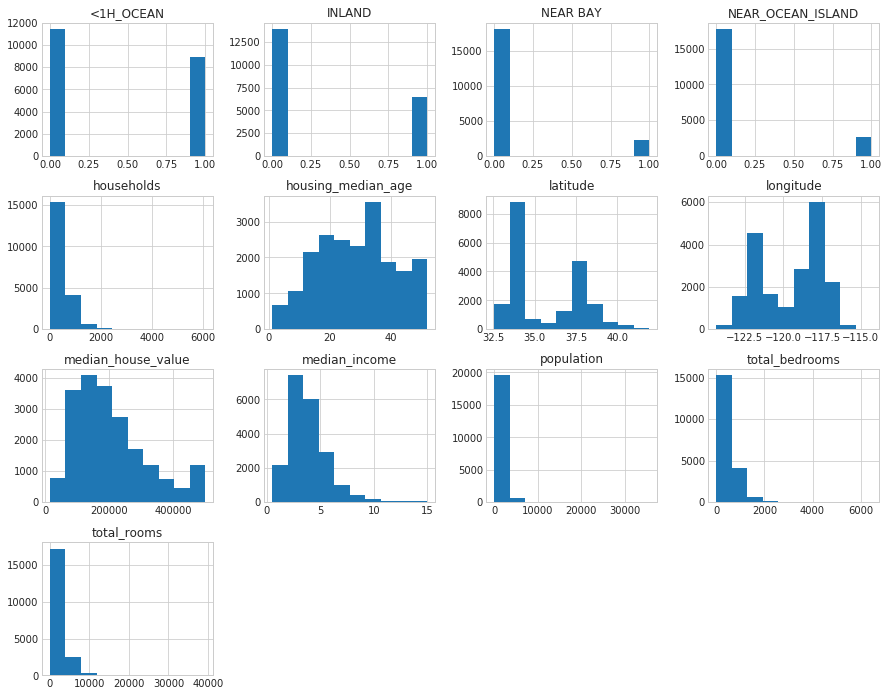

In [22]:
Housing_Data.hist(figsize=(15,12))

'ocean_proximity'

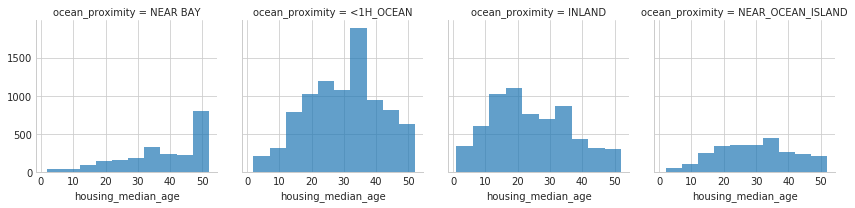

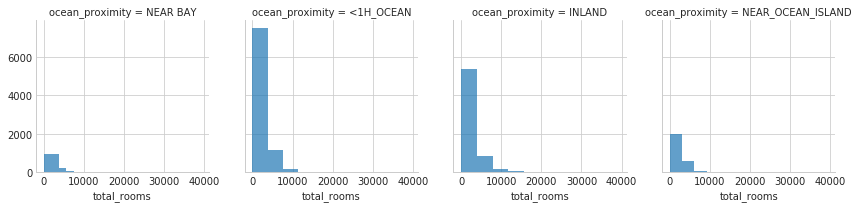

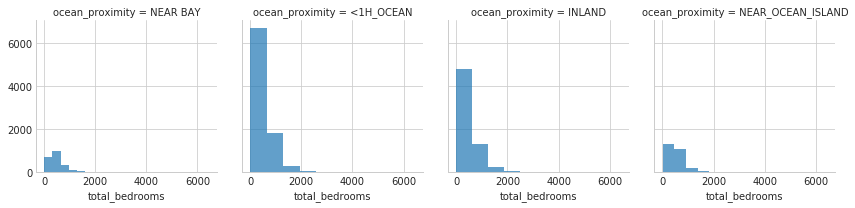

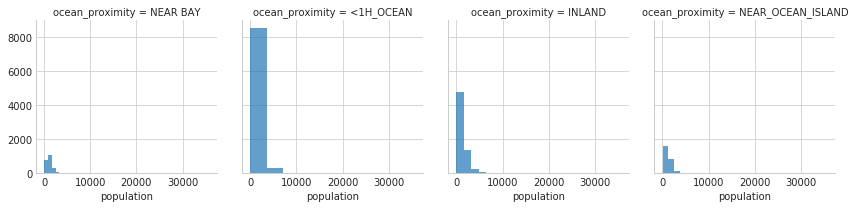

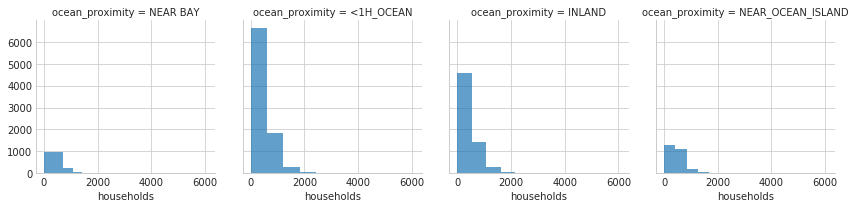

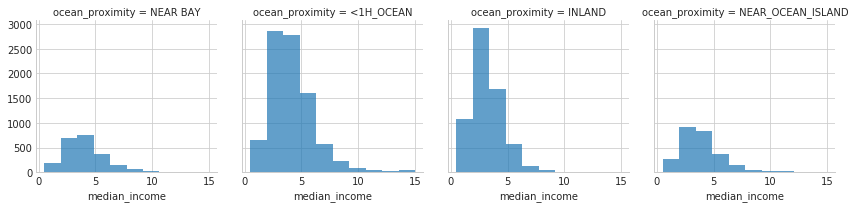

In [23]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col


num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cond_hists(Housing_Data, num_cols, 'ocean_proximity')

In [24]:
Housing_Data.drop('ocean_proximity', axis = 1, inplace = True)

Examine this series of conditioned plots. 
There is a consistent difference in the distributions of the numeric features conditioned on the categories of Ocean proximity. 
The Near Bay category is distributed differently from the other categories of Ocean proximity.

# Transforming numeric features


To improve performance of machine learning models transformations of the values are often applied. 
Typically, transformations are used to make the relationships between variables more linear. 
In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. 
These transformations can include taking logarithms, exponential transformations and power transformations.

In this case, we will transform the label, the price of the house. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


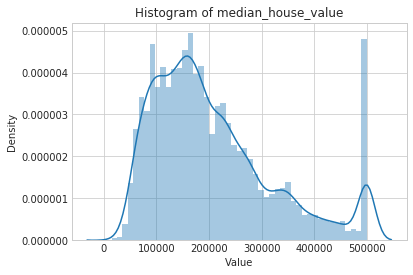

In [25]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(Housing_Data['median_house_value'])
hist_plot(Housing_Data['median_house_value'], 'median_house_value')

The distribution of median_house_value is both quite skewed to the left. 
Given the skew and the fact that there are no values less than or equal to zero, a log transformation might be appropriate.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


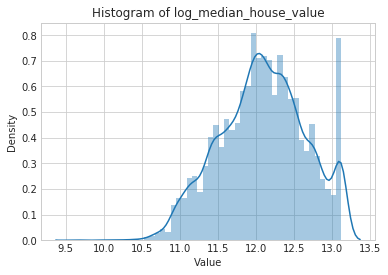

In [26]:
Housing_Data['log_median_house_value'] = np.log(Housing_Data['median_house_value'])
hist_plot(Housing_Data['log_median_house_value'], 'log_median_house_value')

The distribution of the logarithm of price is more symmetric, but still shows some multimodal tendency and skew. 
Nonetheless, this is an improvement so we will use these values as our label.

# 2d hexbin plots and 1d histograms for Transformed variable

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


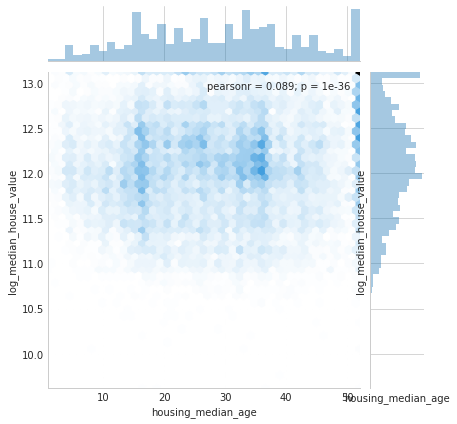

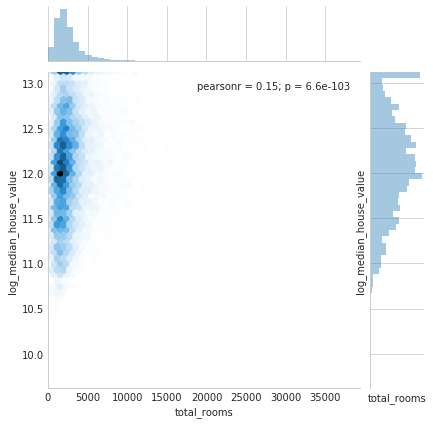

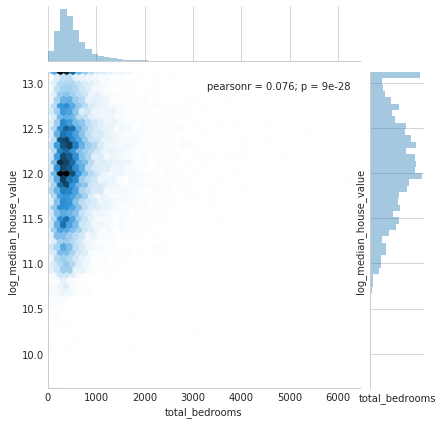

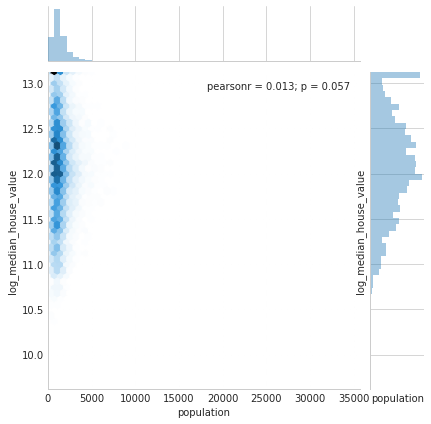

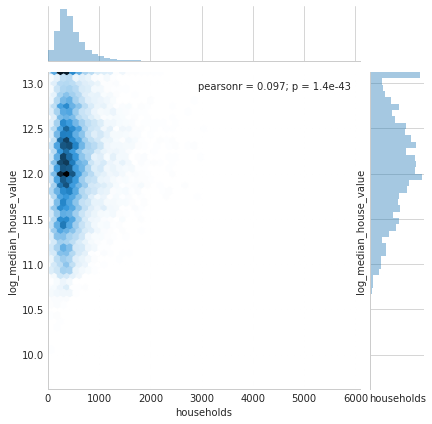

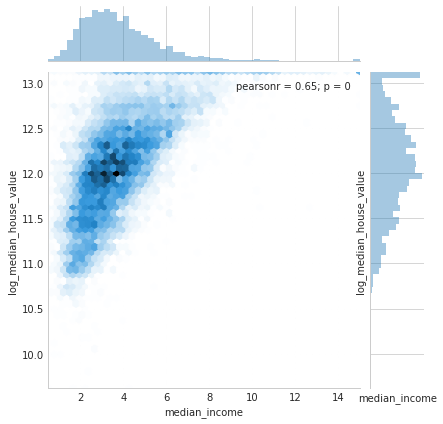

In [27]:
def plot_desity_2d(Housing_Data, cols, col_y = 'log_median_house_value', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=Housing_Data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()


num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
plot_desity_2d(Housing_Data, num_cols, kind = 'hex')  

# Modelling and Predictions

In [28]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

In [29]:
X = Housing_Data.drop(['log_median_house_value'], axis=1)
y = Housing_Data.log_median_house_value

In [30]:
X = convert.fit_transform(X.values)
y = convert.fit_transform(y.values.reshape(-1,1)).flatten() 

In [31]:
X


array([[-1.31594388,  1.04344447,  0.97338217, ..., -0.68246853,
         2.80719599, -0.38792594],
       [-1.31096186,  1.03409121, -0.62127991, ..., -0.68246853,
         2.80719599, -0.38792594],
       [-1.32092591,  1.02941458,  1.85044631, ..., -0.68246853,
         2.80719599, -0.38792594],
       ...,
       [-0.8127594 ,  1.76832222, -0.94021232, ...,  1.46526902,
        -0.35622735, -0.38792594],
       [-0.86257964,  1.76832222, -0.86047922, ...,  1.46526902,
        -0.35622735, -0.38792594],
       [-0.82272345,  1.74026244, -1.01994543, ...,  1.46526902,
        -0.35622735, -0.38792594]])

In [32]:
y

array([ 1.66242576,  1.24899205,  1.21704011, ..., -1.15782807,
       -1.31024674, -1.21445339])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10) 


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
from sklearn.cluster import  KMeans

In [35]:

#==============================================================================
# Fitting the Linear Regression algo to the Training set
#==============================================================================
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
Linear_Reg.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
Linear_Reg_Predit = Linear_Reg.predict(X_test)

In [37]:
print(Linear_Reg_Predit)

[-0.06839873 -1.43406035 -0.7817166  ...  0.0932834  -0.86325957
  0.12990449]


In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
 print("Root Mean Squared Error for test data with Linear Regression  is "+str(np.sqrt(mean_squared_error(y_test,Linear_Reg_Predit))))

Root Mean Squared Error for test data with Linear Regression  is 0.2791863096037413


In [40]:
#==============================================================================
# Fitting the Decision Tree Regressor algo to the Training set
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
DecisionTree_reg = DecisionTreeRegressor()
DecisionTree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
DecisionTree_Reg_Predit = DecisionTree_reg.predict(X_test)

In [42]:
     print("Root Mean Squared Error for test data with Decision Tree Regression  is "+str(np.sqrt(mean_squared_error(y_test,DecisionTree_Reg_Predit))))

Root Mean Squared Error for test data with Decision Tree Regression  is 0.0008952205298200781


In [43]:
#==============================================================================
# Fitting the Random Forest Regressor algo to the Training set
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
Random_forest_reg = RandomForestRegressor()
Random_forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
Random_forest_Reg_Predit = Random_forest_reg.predict(X_test)

In [45]:
     print("Root Mean Squared Error for test data with Random Forest Regression  is "+str(np.sqrt(mean_squared_error(y_test,Random_forest_Reg_Predit))))

Root Mean Squared Error for test data with Random Forest Regression  is 0.0043445729662776045


# Choosing the Best Model 
#Decision Tree Regressor has the best accuracy as the RMSE is the lowest amoung the three models